In [17]:
import pandas as pd
import numpy as np
import math
from scipy.stats import mannwhitneyu
from scipy.stats import ks_2samp
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,10)})
sns.set_style("whitegrid")
sns.set_context("poster")
import matplotlib.pylab as plt
pd.set_option('display.max_rows', 2000)
pd.set_option('max_colwidth', None)

In [18]:
def traits_per_snp(traits,assoc,pval,pheno):
    bonferroni = 0.05/len(traits)
    assoc = assoc[assoc[pval]<=bonferroni]
    assoc.drop(pval,axis=1,inplace=True)
    assoc = assoc.drop_duplicates()
    
    assoc['POS'] = assoc['Chr'] + '_' + assoc['End'].astype(str)
    index_i = pd.merge(assoc,browning18,on='POS')['POS'].drop_duplicates()
    
    assoc_nc = assoc[~assoc['POS'].isin(circadian_i['POS'])]
    assoc_c = assoc[assoc['POS'].isin(circadian_i['POS'])]
    
    b = assoc_nc.value_counts('POS').reset_index()#.reindex(index_i, fill_value=0).reset_index()
    a = assoc_c.value_counts('POS').reset_index()#.reindex(index_i, fill_value=0).reset_index()
    
    b['Set'] = 'Non-Circadian'
    a['Set'] = 'Circadian'

    df = pd.concat([a,b])
    
    U1, p = mannwhitneyu(a[0],b[0])
    print(U1,p)
    print(ks_2samp(a[0], b[0]))
    
    return df


In [19]:
def plot_boxplot(df,y,title):
    sns.boxplot(x='Set',y=y, data=df, showfliers = False)
    plt.ylabel('Phenotypes per variant')
    plt.title(title)


In [20]:
circadian_i = pd.read_csv('../data/circadian_variants_introgressed.bed', 
                          sep='\t').iloc[:,:3].drop_duplicates()
circadian_i['POS'] = circadian_i['Chr'] + '_' + circadian_i['End'].astype(str)

circadian = pd.read_csv('../data/circadian_variants.bed', sep='\t').iloc[:,:3].drop_duplicates()

In [21]:
# LOAD INTROGRESSED VARIANTS
browning18 = pd.read_csv('/dors/capra_lab/data/ancient_dna/archaic_hominin/browning18/introgressed_variants/introgressed_variants_browning18_hg19.bed',
                        sep='\t').iloc[:,:3]
browning18['POS'] = browning18['#CHR'].astype(str).str.cat(browning18['STOP'].astype(str), sep='_').drop_duplicates()


In [22]:
# UKBiobank GWAS

In [23]:
# (paste /dors/capra_lab/data/ukbb_gwas/ukbiobank_gwas_round2_signif.tsv ../data/circadian_variants_introgressed.bed | head -1 && intersectBed -wa -wb -a /dors/capra_lab/data/ukbb_gwas/ukbiobank_gwas_round2_signif.tsv -b ../data/circadian_variants_introgressed.bed) > ../notebooks/data/ukbb_gwas_introgressed.tab


In [24]:
ukbb = pd.read_csv('../bin/raw/intersection_nealelab_browning18.txt', sep='\t', 
                   usecols=['Chr','Start','End','pval','phenotype'], low_memory=False)

# 
#ukbb_traits = [n.strip() for n in open('data/ukbb_gwas_traits.list').readlines()][2:]
ukbb_traits = ukbb['phenotype'].drop_duplicates().values.tolist()


/home/velazqks/.conda/envs/ksva/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


298315222.0 6.657975674648601e-54
KstestResult(statistic=0.11994586009672636, pvalue=1.2986961260036159e-53)


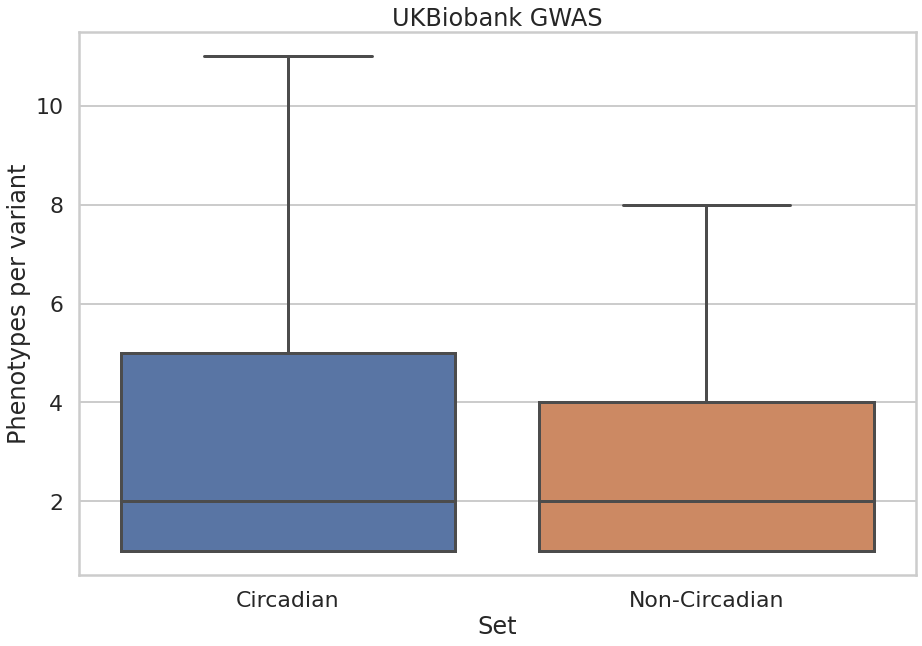

In [25]:
# PLOT TRAITS PER VARIANT
ukbb_tps = traits_per_snp(ukbb_traits, ukbb, 'pval', 'phenotype')
plot_boxplot(ukbb_tps, 0, 'UKBiobank GWAS')

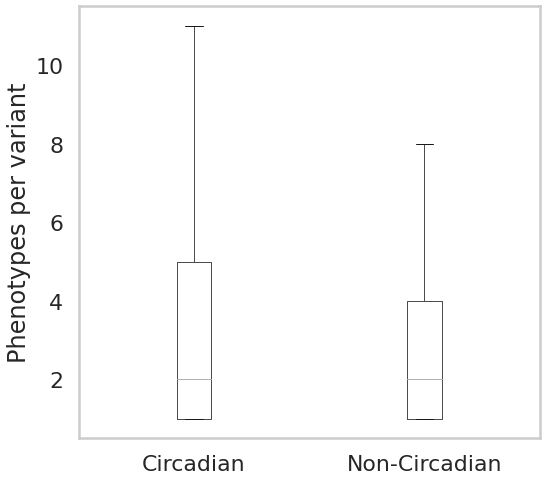

In [26]:
ax = ukbb_tps.boxplot(column=0, by='Set', showfliers = False,
                   figsize=(8, 8), grid=False)

ax.set_ylabel("Phenotypes per variant")
ax.set_xlabel('')

plt.title('');
plt.suptitle('');
plt.savefig("plots/ukbb_traits_per_snp.pdf", dpi=300)


In [ ]:
# ----------------------------------------------------------------------

In [8]:
from scipy.stats import ks_2samp

#perform Kolmogorov-Smirnov test
ks_2samp(a[0], b[0])


NameError: name 'a' is not defined